<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Correlation-heatmap" data-toc-modified-id="Correlation-heatmap-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Correlation heatmap</a></span></li></ul></li><li><span><a href="#Continuous-Variables" data-toc-modified-id="Continuous-Variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Continuous Variables</a></span></li><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Categorical Variables</a></span></li><li><span><a href="#Bi-variate-Analysis" data-toc-modified-id="Bi-variate-Analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bi-variate Analysis</a></span></li></ul></div>

# Description

**General Introduction**  

This project uses the data from [LendingClub](https://www.lendingclub.com/) website data which was collected by Kaggle user [Wendy Kan](https://www.kaggle.com/wendykan/lending-club-loan-data).


**Wikipedia Introduction**
- https://www.wikiwand.com/en/LendingClub  


LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform. The company claims that \$15.98 billion in loans had been originated through its platform up to December 31, 2015.

LendingClub enables borrowers to create unsecured personal loans between \$1,000 and \$40,000. The standard loan period is three years. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.

**Dataset Introduction**  
These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables. A data dictionary is provided in a separate file.

# Imports

In [7]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%autoreload 2

In [9]:
# my personal library
from bhishan import bp

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()

from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') 


[(x.__name__,x.__version__) for x in [np,pd,sns]]

[('numpy', '1.18.1'), ('pandas', '1.0.1'), ('seaborn', '0.9.0')]

In [11]:
pd.options.display.max_columns=None

In [12]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [13]:
import sys # sys.getsizeof(df)

# Load the data

In [14]:
!du -sh ../data/loan.csv

1.1G	../data/loan.csv


In [15]:
# our data is huge, 1.1GB be careful when loading with pandas.

In [16]:
!head -1 ../data/loan.csv

In [17]:
!head -1 ../data/loan.csv

In [18]:
tmp = pd.read_csv('../data/loan.csv',nrows=5)

print(tmp.shape)
tmp

(5, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,Apr-2001,1,NaN,45.0,9,1,4341,10.3,34,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,16901,2,2,1,2,2,12560,69,2,7,2137,28,42000,1,11,2,9,1878,34360,5.9,0,0,140,212,1,1,0,1,NaN,2,NaN,0,2,5,3,3,16,7,18,5,9,0,0,0,3,100.0,0,1,0,60124,16901,36500,18124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0,Jun-1987,0,71.0,75.0,13,1,12315,24.2,44,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1208,321915,4,4,2,3,3,87153,88,4,5,998,57,50800,2,15,2,10,24763,13761,8.3,0,0,163,378,4,3,3,4,NaN,4,NaN,0,2,4,4,9,27,8,14,4,13,0,0,0,6,95.0,0,1,0,372872,99468,15000,94072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1,13,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,Feb-2019,180.69,Mar-2019,Feb-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14,7150,72,0,2,0,35,24100,1,5,0,4,1

In [19]:
usecols = ['loan_amnt','funded_amnt','term',
          'int_rate','grade','emp_title',
           'emp_length', 'home_ownership', 'annual_inc',
           'issue_d', 'loan_status', 'pymnt_plan',
           'addr_state','dti','verification_status','purpose'
          ]

df = pd.read_csv('../data/loan.csv',usecols=usecols)

In [20]:
# tmp.columns.to_numpy()

# Data Visualization

## Correlation heatmap

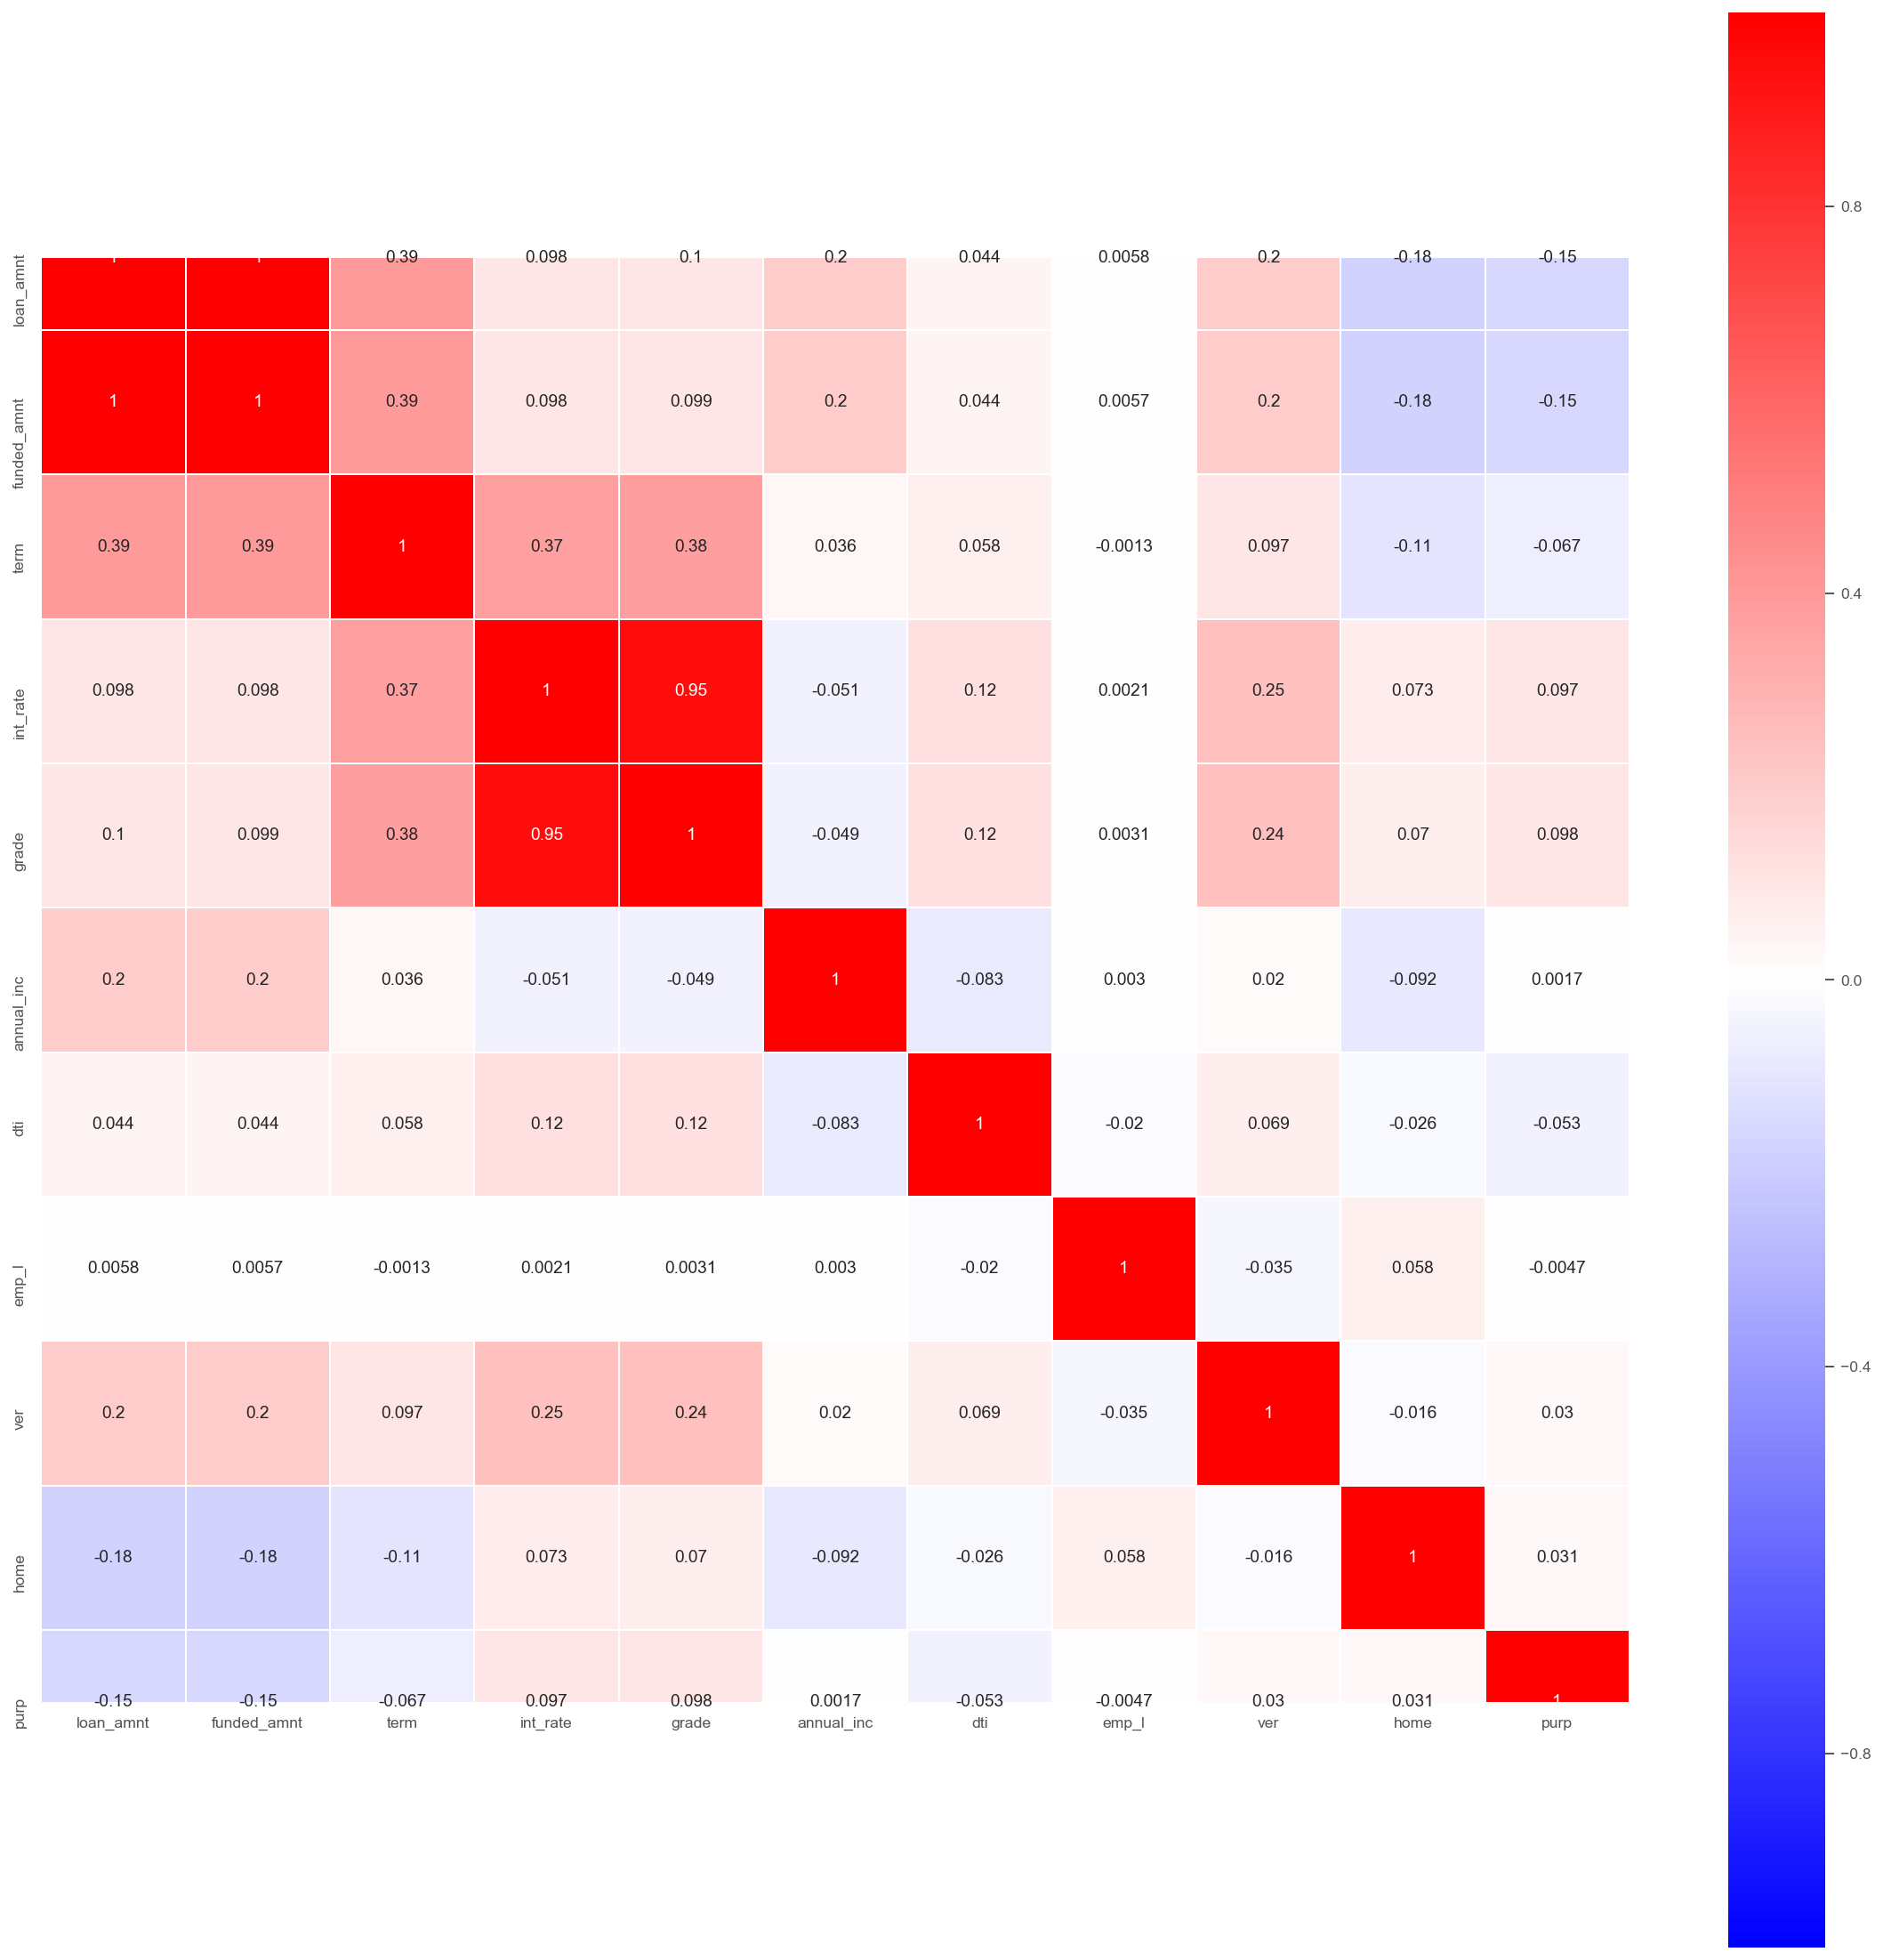

In [21]:
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1)


sns.heatmap(df.assign(
    grade=df.grade.astype('category').cat.codes,
    term=df.term.astype('category').cat.codes,
    emp_l=df.emp_length.astype('category').cat.codes,
    ver =df.verification_status.astype('category').cat.codes,           home=df.home_ownership.astype('category').cat.codes,                 purp=df.purpose.astype('category').cat.codes
).corr(), 
annot=True, cmap='bwr',vmin=-1,
            vmax=1, square=True,
            linewidths=0.5)

# Continuous Variables

In [22]:
df.head(2)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti
0,2500,2500,36 months,13.56,C,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,NY,18.24
1,30000,30000,60 months,18.94,D,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,LA,26.52


,count,mean,std,min,25%,50%,75%,max
loan_amnt,2260668.0,15046.931228,9190.245488,500.0,8000.0,12900.0,20000.0,40000.0


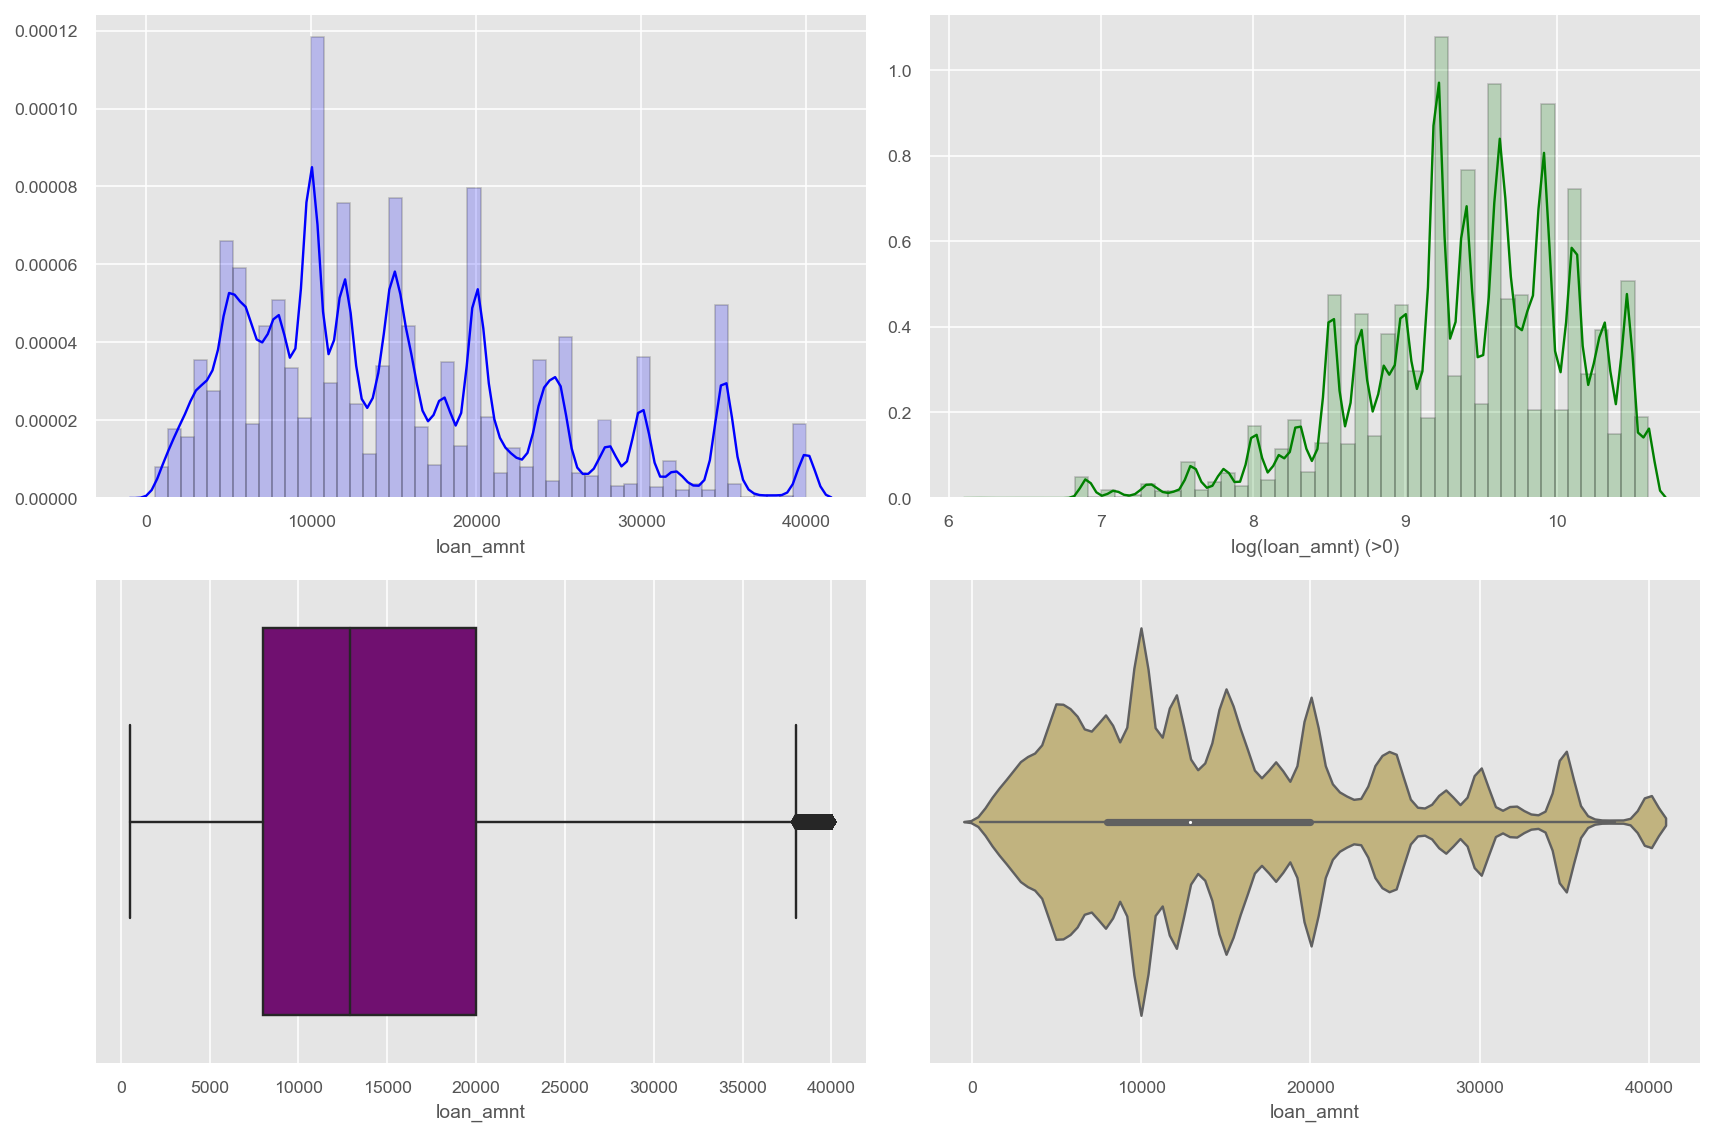

In [23]:
bp.plot_num(df, 'loan_amnt')

,count,mean,std,min,25%,50%,75%,max
funded_amnt,2260668.0,15041.664057,9188.413022,500.0,8000.0,12875.0,20000.0,40000.0


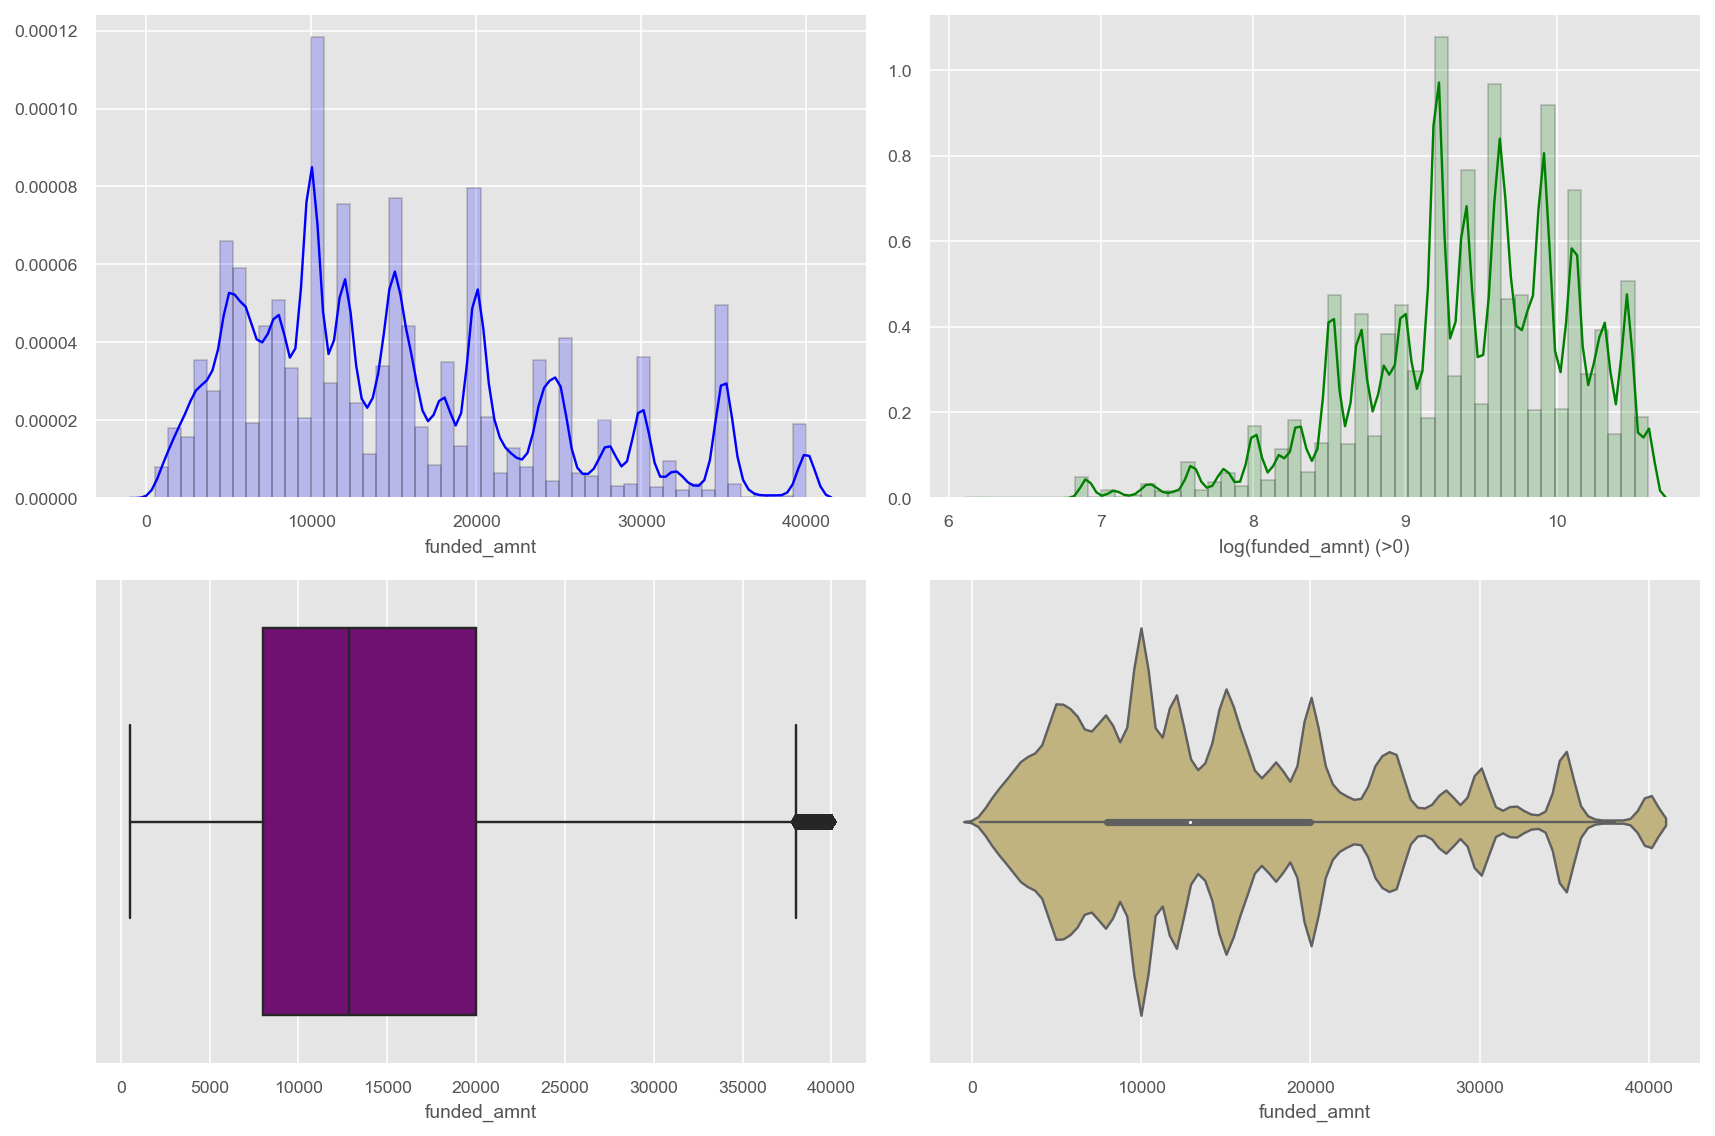

In [24]:
bp.plot_num(df, 'funded_amnt')

,count,mean,std,min,25%,50%,75%,max
annual_inc,2260664.0,77992.428687,112696.199574,0.0,46000.0,65000.0,93000.0,110000000.0


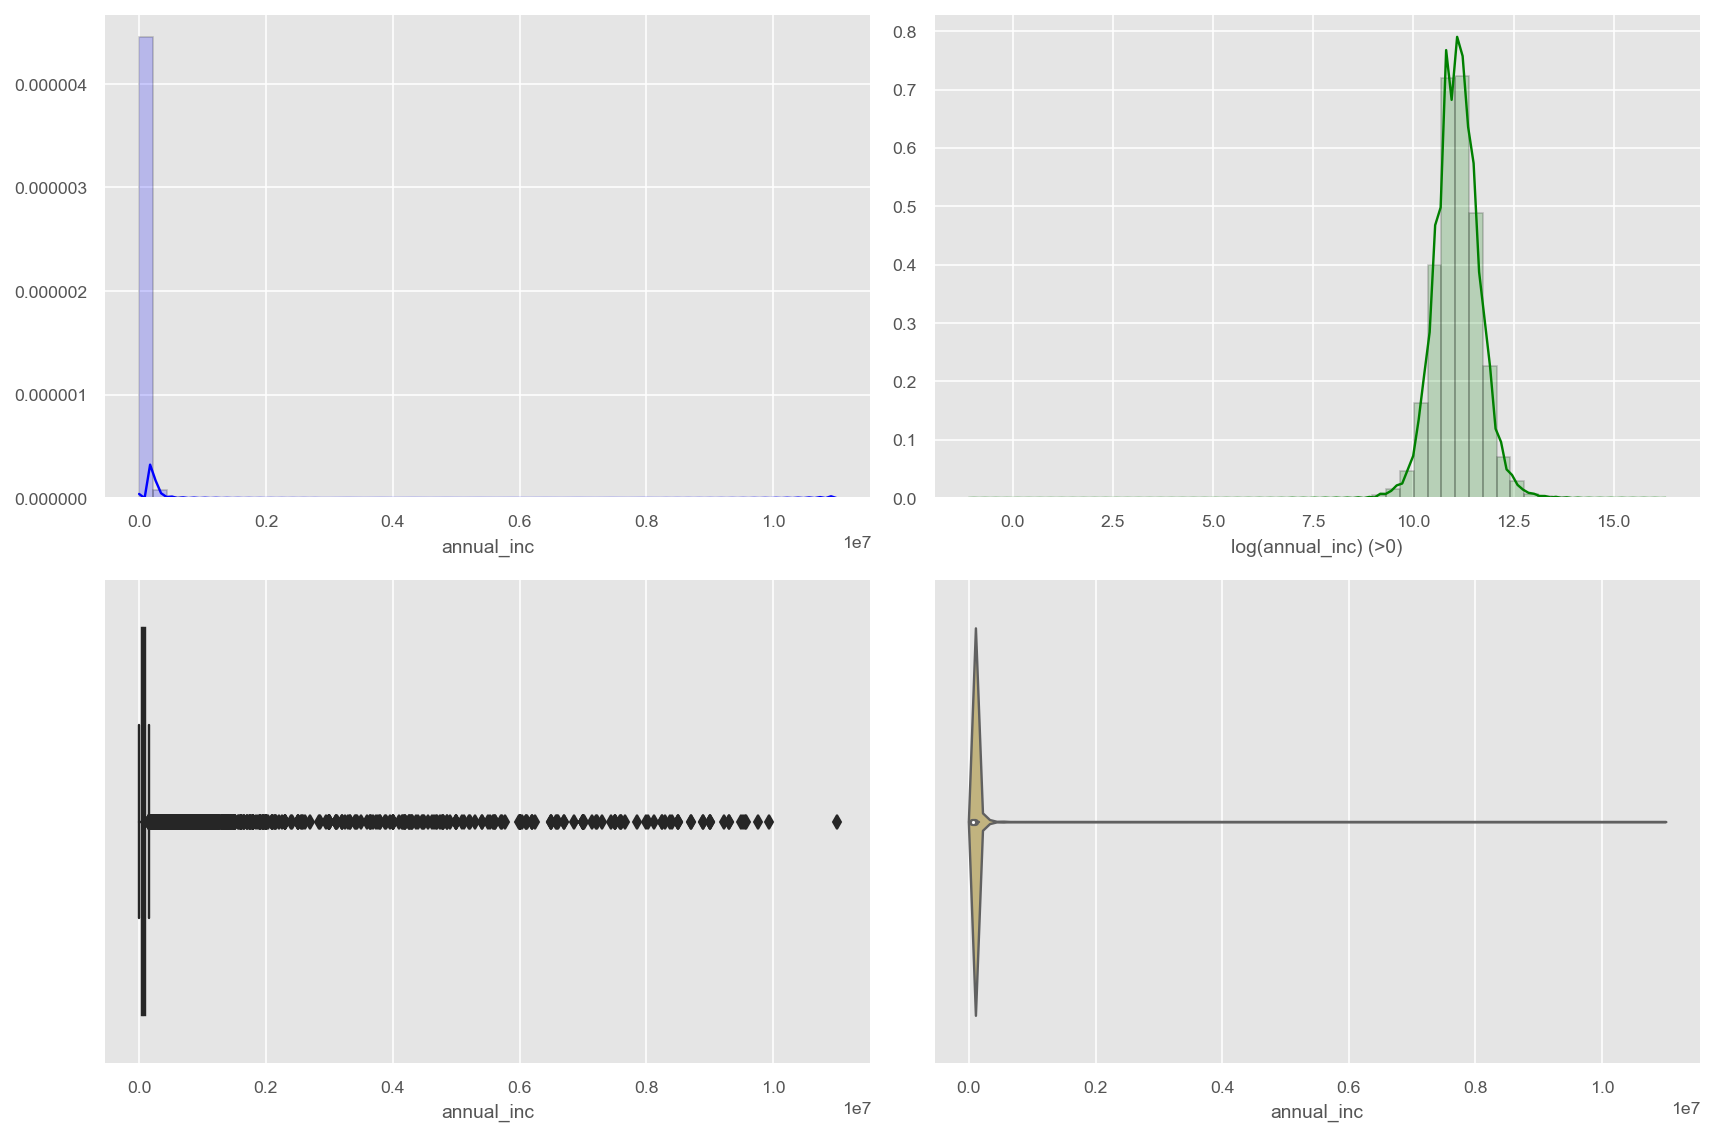

In [25]:
bp.plot_num(df, 'annual_inc',xlim=[0,0.2e8])

,count,mean,std,min,25%,50%,75%,max
dti,2258957.0,18.824196,14.183329,-1.0,11.89,17.84,24.49,999.0


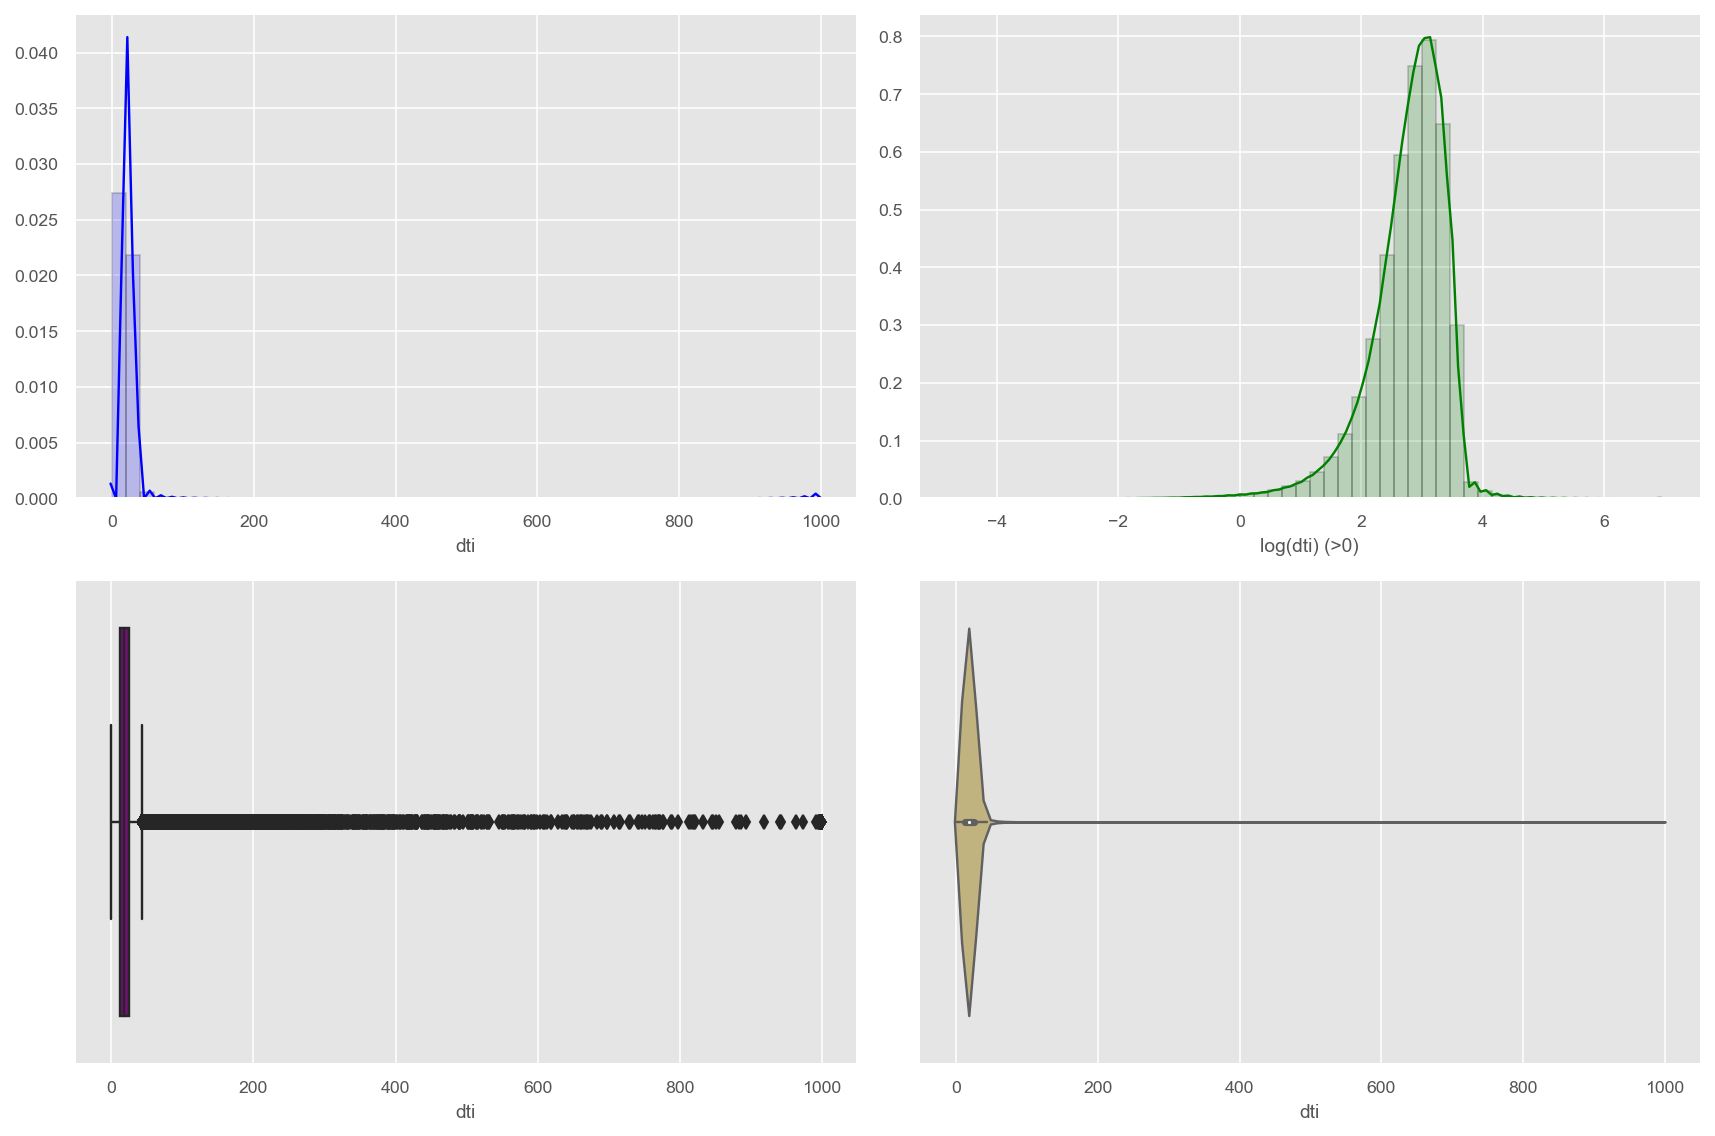

In [26]:
bp.plot_num(df, 'dti')

# Categorical Variables

In [27]:
df.select_dtypes('object').head(2)

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state
0,36 months,C,Chef,10+ years,RENT,Not Verified,Dec-2018,Current,n,debt_consolidation,NY
1,60 months,D,Postmaster,10+ years,MORTGAGE,Source Verified,Dec-2018,Current,n,debt_consolidation,LA


In [28]:
df.select_dtypes('object').nunique().sort_values()

term                        2
pymnt_plan                  2
verification_status         3
home_ownership              6
grade                       7
loan_status                 9
emp_length                 11
purpose                    14
addr_state                 51
issue_d                   139
emp_title              512694
dtype: int64

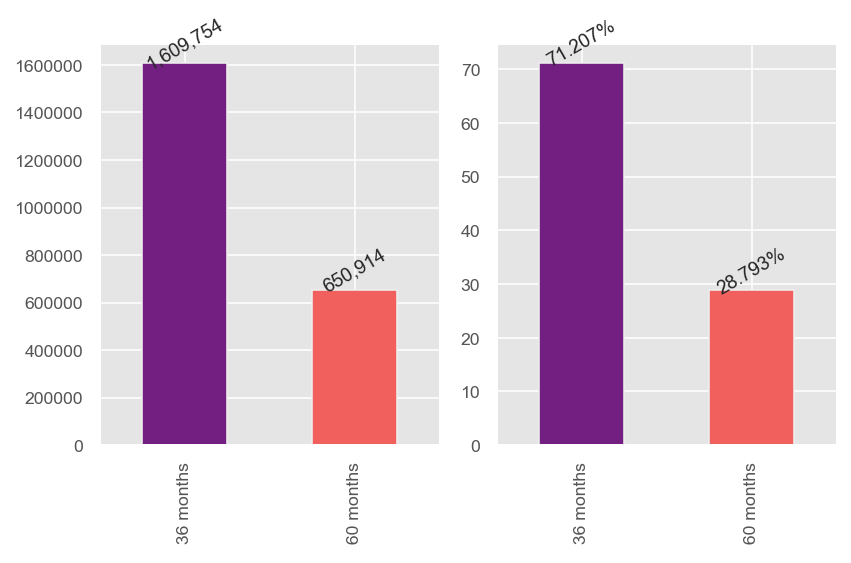

Feature: **term**
Overall Count: 
     36 months: 71.21%
     60 months: 28.79%


In [29]:
bp.plot_cat(df,'term')

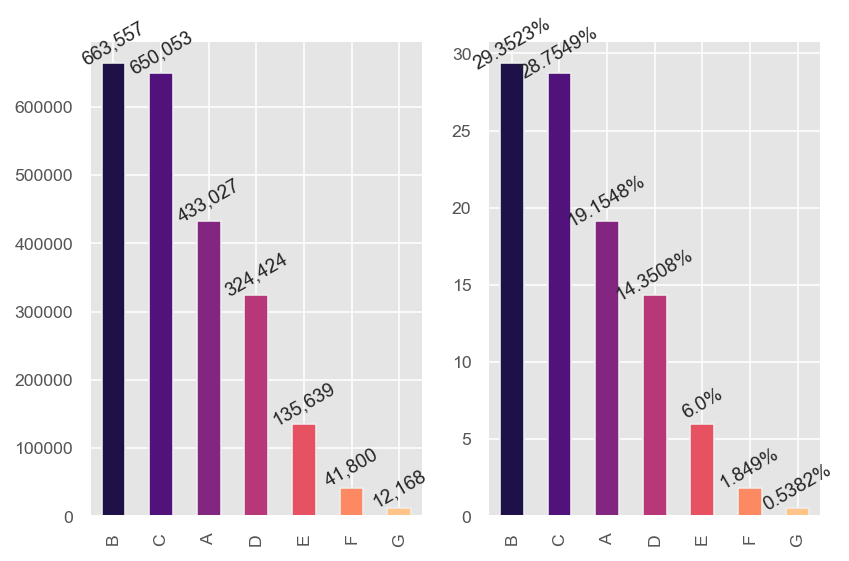

Feature: **grade**
Overall Count: 
    B: 29.35%
    C: 28.75%
    A: 19.15%
    D: 14.35%
    E: 6.0%
    F: 1.85%
    G: 0.54%


In [30]:
bp.plot_cat(df, 'grade')

# Bi-variate Analysis

In [31]:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [32]:
bad = ['Late (31-120 days)',
       'Charged Off',
       'Default',
       'Does not meet the credit policy. Status:Charged Off']
df['good_bad'] = np.where(df['loan_status'].isin(bad),0,1)

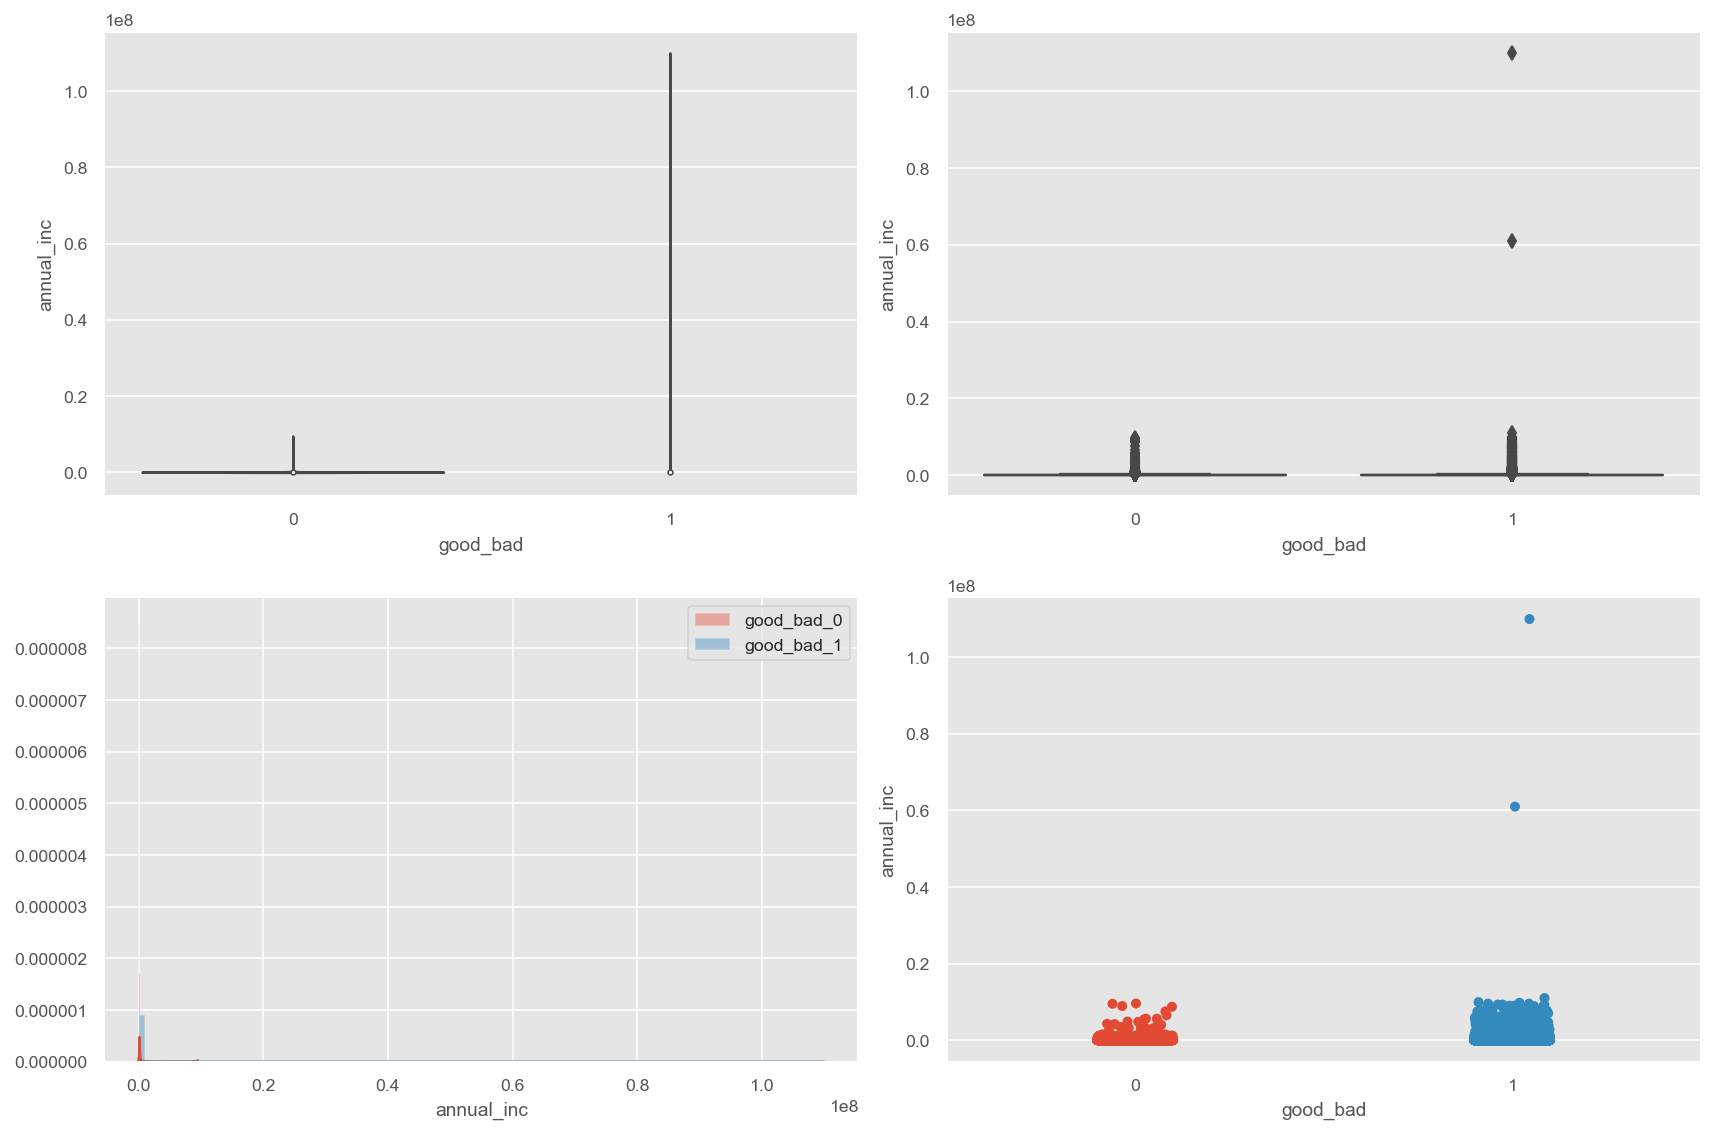

,count,mean,std,min,25%,50%,75%,max
good_bad,,,,,,,,
good_bad_0,284344.0,70798.11,67881.09,0.0,43254.5,60000.0,85000.0,9573072.0
good_bad_1,1976320.0,79027.51,117712.55,0.0,47000.0,65300.0,95000.0,110000000.0
annual_inc,2260664.0,77992.43,112696.20,0.0,46000.0,65000.0,93000.0,110000000.0


In [33]:
bp.plot_num_cat(df,'annual_inc','good_bad')

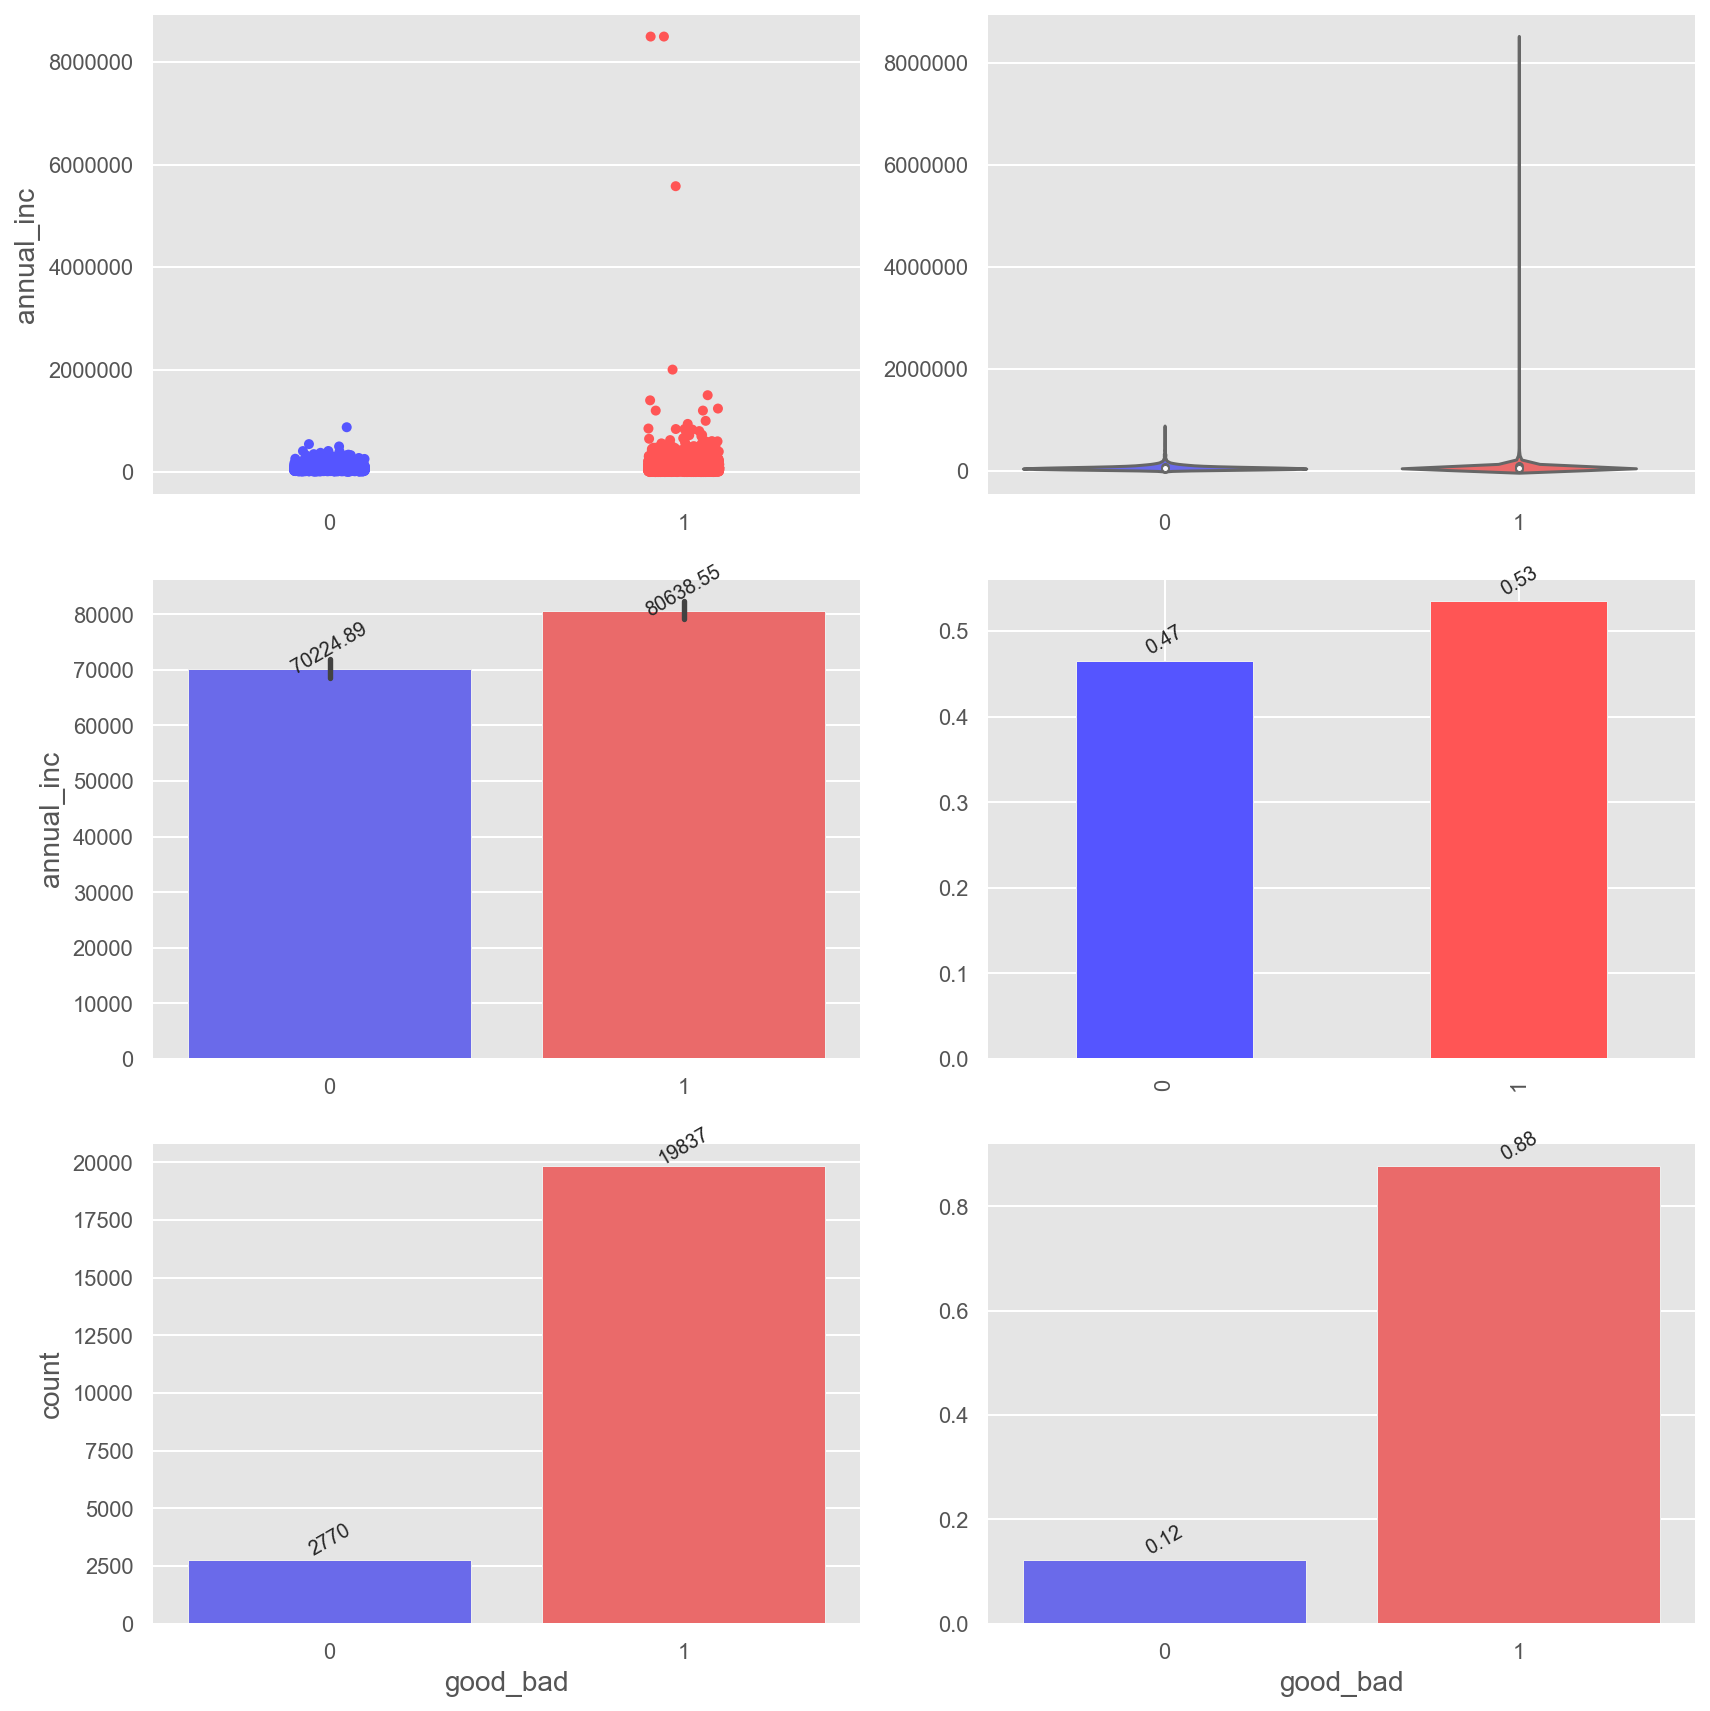

In [43]:
bp.plot_cat_num(df,'good_bad','annual_inc')